In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import gc

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir = 'G:\AI_INTRO\CODE_BASIS\DATASET', untar = True)

In [3]:
data_dir

'G:\\AI_INTRO\\CODE_BASIS\\DATASET\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

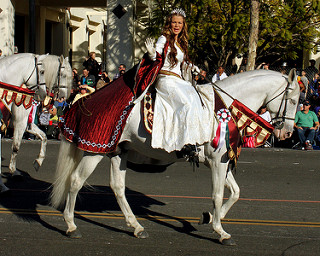

In [7]:
PIL.Image.open(str(roses[11]))

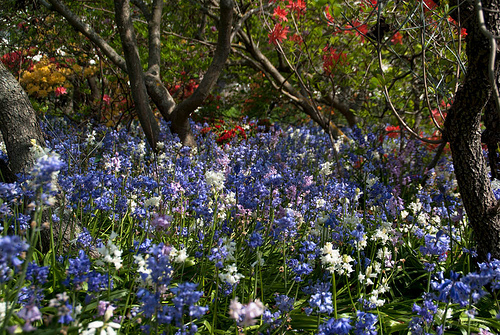

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [9]:
flowers_img_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_img_dict['roses']

[WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('G:/AI_INTRO/CODE_BASIS/DATASET/datasets/

In [11]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [12]:
str(flowers_img_dict['roses'][0])

'G:\\AI_INTRO\\CODE_BASIS\\DATASET\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [13]:
img = cv2.imread(str(flowers_img_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [16]:
for flower_name, images in flowers_img_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [17]:
for flower_name, image in flowers_img_dict.items():
    print(len(images))
#     for image in images:
#         print(flowers_labels_dict[flower_name])

799
799
799
799
799


In [18]:
X,y  =[], []

for flower_name, images in flowers_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
        

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  

gc.collect()

Epoch 1/30
86/86 [==============================] - 4s 29ms/step - loss: 1.4509 - accuracy: 0.3826
Epoch 2/30
86/86 [==============================] - 2s 29ms/step - loss: 1.0910 - accuracy: 0.5570
Epoch 3/30
86/86 [==============================] - 2s 29ms/step - loss: 0.9467 - accuracy: 0.6370
Epoch 4/30
86/86 [==============================] - 2s 29ms/step - loss: 0.7624 - accuracy: 0.6991
Epoch 5/30
86/86 [==============================] - 2s 29ms/step - loss: 0.5728 - accuracy: 0.7805
Epoch 6/30
86/86 [==============================] - 2s 29ms/step - loss: 0.3669 - accuracy: 0.8717
Epoch 7/30
86/86 [==============================] - 2s 29ms/step - loss: 0.2299 - accuracy: 0.9215
Epoch 8/30
86/86 [==============================] - 2s 29ms/step - loss: 0.1439 - accuracy: 0.9528
Epoch 9/30
86/86 [==============================] - 3s 29ms/step - loss: 0.0824 - accuracy: 0.9764
Epoch 10/30
86/86 [==============================] - 3s 30ms/step - loss: 0.0820 - accuracy: 0.9767
Epoch 11/

2057

In [23]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 0s 12ms/step - loss: 2.8694 - accuracy: 0.6525


[2.86936616897583, 0.6525054574012756]

In [24]:
predictions = model.predict(X_test_scaled)
predictions

array([[  7.6796136,  29.632833 ,   9.249886 , -20.619612 , -17.068634 ],
       [ 14.101234 ,   3.9834926, -11.935603 , -13.863161 ,   8.773388 ],
       [  3.51907  ,   8.500769 ,  15.883167 ,  -7.332658 ,   1.2088071],
       ...,
       [  2.3604598,   1.3855463,  -3.4191978,   7.715231 ,   2.5357552],
       [  1.2227372,   7.0504313,   1.2969707,   3.4990304,   5.2771587],
       [  3.5525098, -15.344172 ,   1.0485433,  10.65469  ,   2.1632357]],
      dtype=float32)

In [25]:
score = tf.nn.softmax(predictions[0])

In [26]:
np.argmax(score)

1

In [27]:
y_test[0]

1

In [28]:
data_augmentation = keras.Sequential(
  [
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

gc.collect()

4421

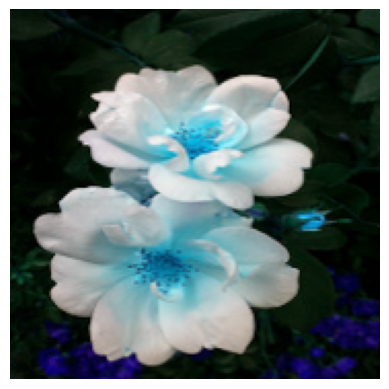

In [29]:
plt.axis('off')
plt.imshow(X[0])

In [32]:

data_augmentation = keras.Sequential(
  [
#     layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                  input_shape=(img_height, 
#                                                               img_width,
#                                                               3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

gc.collect()

944

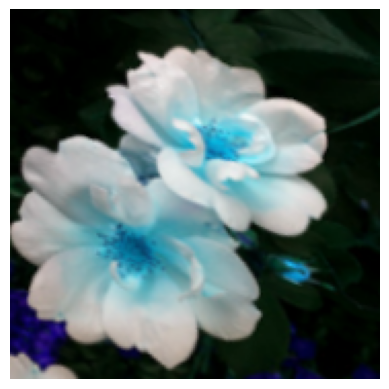

In [33]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [34]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 3s 31ms/step - loss: 1.3335 - accuracy: 0.4284
Epoch 2/30
86/86 [==============================] - 3s 31ms/step - loss: 1.0419 - accuracy: 0.5938
Epoch 3/30
86/86 [==============================] - 3s 31ms/step - loss: 0.9411 - accuracy: 0.6399
Epoch 4/30
86/86 [==============================] - 3s 31ms/step - loss: 0.8622 - accuracy: 0.6661
Epoch 5/30
86/86 [==============================] - 3s 31ms/step - loss: 0.7802 - accuracy: 0.6969
Epoch 6/30
86/86 [==============================] - 3s 31ms/step - loss: 0.7247 - accuracy: 0.7278
Epoch 7/30
86/86 [==============================] - 3s 31ms/step - loss: 0.6965 - accuracy: 0.7297
Epoch 8/30
86/86 [==============================] - 3s 31ms/step - loss: 0.6481 - accuracy: 0.7555
Epoch 9/30
86/86 [==============================] - 3s 31ms/step - loss: 0.6051 - accuracy: 0.7740
Epoch 10/30
86/86 [==============================] - 3s 31ms/step - loss: 0.5886 - accuracy: 0.7798
Epoch 11/

In [35]:
gc.collect()

18610

In [36]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 0s 8ms/step - loss: 1.3615 - accuracy: 0.7277


[1.3615078926086426, 0.727668821811676]